In [216]:
# marker i need is gender, health, welath, race

# https://opendata.cbs.nl/statline/portal.html?_la=en&_catalog=CBS&tableId=83779ENG&_theme=1092


import pandas as pd
import seaborn as sns
import random



      Sex PersonCharacteristics  k_20thPercentile_4  k_40thPercentile_5  \
0    male               western                -7.3                 1.0   
1    male           non-western                -7.0                 1.5   
2  female               western                -6.6                 1.1   
3  female           non-western                -6.2                 1.5   

   k_60thPercentile_6  k_80thPercentile_7  
0                 5.0                14.8  
1                 6.6                18.4  
2                 4.6                14.2  
3                 6.3                17.3  


<AxesSubplot: xlabel='percentile', ylabel='value'>

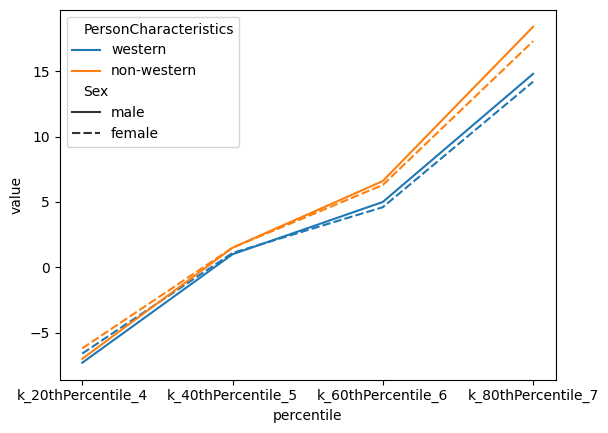

In [96]:
# 4000 women 
# 2012655 western
df = pd.read_csv("../data/ppd_intersect.csv", sep=';')
df = df.replace(4000, "female")
df = df.replace(3000, "male")
df = df.replace(2012655, "western")
df = df.replace(2012657, "non-western")
df = df.drop(["ID", "Periods"], axis = 1)
print(df)


df = df.melt(id_vars=["Sex", "PersonCharacteristics"], 
        var_name="percentile", 
        value_name="value")

sns.lineplot(y="value", x="percentile", hue = "PersonCharacteristics", style = "Sex", data = df)

In [191]:
#https://opendata.cbs.nl/statline/portal.html?_la=en&_catalog=CBS&tableId=83931NED&_theme=185
# 4000 women 
# 2012655 western
df = pd.read_csv("../data/income_is.csv", sep=';')
# df = df.replace(4000, "female")
# df = df.replace(3000, "male")
# df = df.replace(2012655, "western")
# df = df.replace(2012657, "non-western")
# df = df.replace(1012600, "dutch")



dict_trans = {  'A028702': '10%',
                'A028703' : '20%',
                'A028704' : '30%',
                'A028705' : '40%',
                'A028706' : '50%',
                'A028707' : '60%',
                'A028708' : '70%',
                'A028709' : '80%',
                'A028710' : '90%',
                'A028711' : '100%',
                4000: "female",
                3000: "male",
                2012655: "western",
                2012657: "non-western",
                1012600: "dutch", 
                
                }

df = df.replace(dict_trans)

df = df[df['Inkomensbegrippen'] == 'A043961'] 

df = df.drop(["ID", "Perioden", 'Inkomensbegrippen'], axis = 1)
df.set_index('KenmerkenVanPersonen')
# df.drop(["dutch"])


df = df[df.KenmerkenVanPersonen != 'dutch']

df

# df = df.melt(id_vars=["Sex", "PersonCharacteristics"], 
#         var_name="percentile", 
#         value_name="value")

# sns.scatterplot(y="PersonenMetInkomen_1", x="GemiddeldInkomen_2", hue = "KenmerkenVanPersonen", style = 'Geslacht', data = df)
# # ax.set(ylim=(10, 40))
# df.iloc[[0]]

# sample with frequency by subclass, from medium income by percentile

,Inkomensklassen,Geslacht,KenmerkenVanPersonen,PersonenMetInkomen_1,GemiddeldInkomen_2,MediaanInkomen_3
1,10%,male,western,45.3,0.5,1.0
2,10%,male,non-western,86.2,0.4,1.0
4,10%,female,western,54.6,0.8,1.1
5,10%,female,non-western,83.0,1.0,1.2
7,20%,male,western,40.9,6.3,6.2
8,20%,male,non-western,78.6,6.3,6.1
10,20%,female,western,56.9,6.4,6.3
11,20%,female,non-western,87.2,6.4,6.2
13,30%,male,western,40.7,14.6,14.5
14,30%,male,non-western,68.6,14.4,14.3


[0.00539811 0.04318489 0.09919028 0.16396761 0.2219973  0.27867746
 0.33738192 0.40755735 0.5148448  0.8900135 ]
[0.00337382 0.04251012 0.09851552 0.16464238 0.22402159 0.27935223
 0.33805668 0.40823212 0.5168691  1.        ]


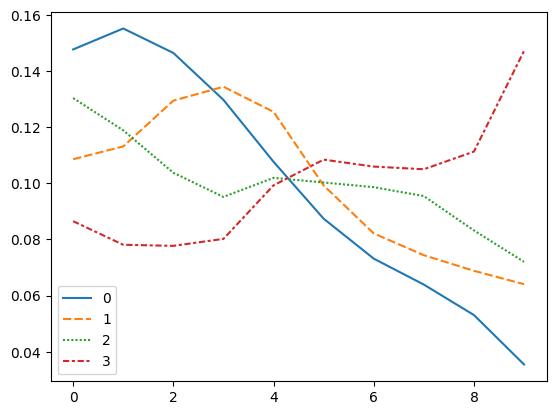

In [343]:
df1 = df.set_index('Geslacht')
df_m= df1.loc['male']
df_f = df1.loc['female'] 

df_mw = df_m.set_index('KenmerkenVanPersonen')
df_mw = df_mw.loc['western']
df_mw = df_mw.set_index('Inkomensklassen')
# df_mw[['PersonenMetInkomen_1','GemiddeldInkomen_2']]

df_mnw = df_m.set_index('KenmerkenVanPersonen')
df_mnw = df_mnw.loc['non-western']
df_mnw = df_mnw.set_index('Inkomensklassen')


df_fw = df_f.set_index('KenmerkenVanPersonen')
df_fw = df_fw.loc['western']
df_fw = df_fw.set_index('Inkomensklassen')
# df_mw[['PersonenMetInkomen_1','GemiddeldInkomen_2']]

df_fnw = df_f.set_index('KenmerkenVanPersonen')
df_fnw = df_fnw.loc['non-western']
df_fnw = df_fnw.set_index('Inkomensklassen')

# variable for n by gender and race
n_mw = df_mw[['PersonenMetInkomen_1']].sum()
n_mnw = df_mnw[['PersonenMetInkomen_1']].sum()
n_fw = df_fw[['PersonenMetInkomen_1']].sum()
n_fnw = df_fnw[['PersonenMetInkomen_1']].sum()

# maybe not normalize but cap at 1 -> divide by highest number over all gemiddelde inkom?
d_fnw= np.array(df_fnw[['PersonenMetInkomen_1']]/ df_fnw[['PersonenMetInkomen_1']].sum()).flatten()
d_mw = np.array(df_mw[['PersonenMetInkomen_1']]/ df_mw[['PersonenMetInkomen_1']].sum()).flatten()
d_mnw = np.array(df_mnw[['PersonenMetInkomen_1']]/ df_mnw[['PersonenMetInkomen_1']].sum()).flatten()
d_fw = np.array(df_fw[['PersonenMetInkomen_1']]/ df_fw[['PersonenMetInkomen_1']].sum()).flatten()

v_fnw = np.array(df_fnw[['GemiddeldInkomen_2']]/ df[['GemiddeldInkomen_2']].max()).flatten()
v_mw = np.array(df_mw[['GemiddeldInkomen_2']]/ df[['GemiddeldInkomen_2']].max()).flatten()
v_mnw = np.array(df_mnw[['GemiddeldInkomen_2']]/ df[['GemiddeldInkomen_2']].max()).flatten()
v_fw = np.array(df_fw[['GemiddeldInkomen_2']]/ df[['GemiddeldInkomen_2']].max()).flatten()
# print(df_mw[['PersonenMetInkomen_1']])
# a = (list(df_fw[['GemiddeldInkomen_2']]))
# print(a)
# b = (np.array(df_fw[['PersonenMetInkomen_1']]))
# print(d_fnw.flatten())
# print(list(b.flatten()))



sns.lineplot([d_fnw, d_fw,d_mnw, d_mw])
# ax.legend(['female non-western','female western','male non-western', 'male western'])


# sns.histplot(res_mw)
# sns.histplot(res_mnw)
# sns.histplot(res_fw)
# plt.legend(title='Income Distribution', loc='upper left', labels=['female non-western', 'mlae western', 'male non-western', 'female western'])
# plt.show()

print(v_fw)
print(v_mw)

The folloing graph shows

<AxesSubplot: ylabel='Count'>

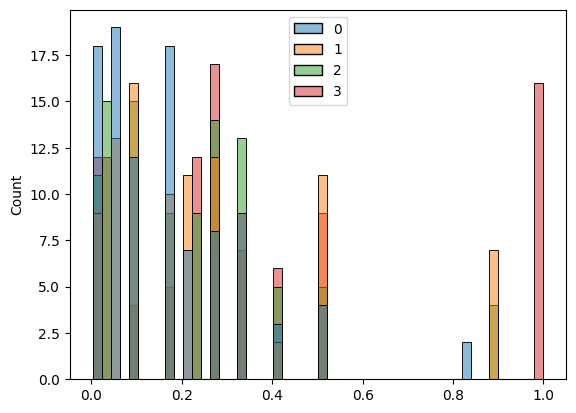

In [338]:
res_fnw = (random.choices(v_fnw, weights=d_fnw, k=100))
res_mw = (random.choices(v_mw, weights=d_mw, k=100))
res_mnw = (random.choices(v_mnw, weights=d_mnw, k=100))
res_fw = (random.choices(v_fw, weights=d_fw, k=100))



sns.histplot([res_fnw, res_fw,res_mnw,res_mw], bins = 50) #  label = 'res_fnw')

# ax.legend(['female non-western','female western','male non-western', 'male western'])




In [313]:
# import statsmodels.api as sm
# import numpy as np

# x = np.array(df1[['GemiddeldInkomen_2']]).flatten()
# y = (np.arange(0,1,0.1))
# print(y,x)
# x_train = sm.add_constant(x)
# logit_model = sm.Logit(y,x_train)
# results = logit_model.fit()
# print(results.summary())
